# Zodiaco y el Test Chi Cuadrado de Pearson

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('nacimientos.csv',index_col=None)

In [3]:
df

,Año,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 35
0,Total,"2,655,571","2,579,301","2,794,390","2,622,031","2,620,262","2,735,312","2,756,447","2,797,397","2,839,686",...,"2,643,908","2,586,287","2,498,880","2,478,889","2,463,420","2,353,596","2,293,708","2,234,039","2,162,535",NaN
1,Enero,"223,337","216,869","234,580","220,992","214,320","227,886","227,537","228,763","233,935",...,"214,400","211,170","204,601","204,967","203,631","197,067","183,476","183,131","180,154",NaN
2,Febrero,"200,827","195,118","209,794","202,778","193,936","204,489","203,678","209,048","212,098",...,"190,572","187,836","184,716","181,093","180,212","173,495","170,477","161,843","155,843",NaN
3,Marzo,"220,468","212,151","231,361","213,620","216,280","225,099","222,869","226,119","230,684",...,"214,304","208,492","201,252","198,189","196,694","189,765","184,787","180,039","171,982",NaN
4,Abril,"211,338","206,377","220,186","203,666","207,033","214,997","216,865","220,704","219,584",...,"201,318","199,474","191,793","193,678","190,010","181,059","180,725","172,374","168,826",NaN
5,Mayo,"223,865","215,411","232,519","215,183","219,691","229,751","230,302","231,999","233,347",...,"210,754","208,416","201,150","199,183","197,475","187,342","180,578","180,021","174,884",NaN
6,Junio,"219,531","211,924","229,294","213,103","217,503","224,257","224,369","231,408","232,125",...,"209,126","205,432","200,145","195,689","193,933","186,147","179,249","178,024","169,808",NaN
7,Julio,"224,318","221,166","234,053","220,478","223,878","231,744","232,566","237,449","241,261",...,"223,265","220,490","214,657","211,667","207,216","198,308","192,086","188,859","183,167",NaN
8,Agosto,"239,016","234,268","252,417","239,054","239,472","246,836","251,280","254,916","260,753",...,"239,986","232,855","227,150","223,534","219,012","207,440","204,994","202,482","193,798",NaN
9,Septiembre,"227,838","224,774","242,597","230,073","232,886","242,307","245,235","247,411","252,216",...,"248,567","238,701","228,710","226,232","228,374","216,557","213,967","206,676","198,930",NaN


In [116]:
enero = df.iloc[1]['2000':'2008'].str.replace(',', '').astype(int)
febrero = df.iloc[2]['2000':'2008'].str.replace(',', '').astype(int)
marzo = df.iloc[3]['2000':'2008'].str.replace(',', '').astype(int)
abril = df.iloc[4]['2000':'2008'].str.replace(',', '').astype(int)
mayo = df.iloc[5]['2000':'2008'].str.replace(',', '').astype(int)
junio = df.iloc[6]['2000':'2008'].str.replace(',', '').astype(int)
julio = df.iloc[7]['2000':'2008'].str.replace(',', '').astype(int)
agosto = df.iloc[8]['2000':'2008'].str.replace(',', '').astype(int)
sept = df.iloc[9]['2000':'2008'].str.replace(',', '').astype(int)
octu = df.iloc[10]['2000':'2008'].str.replace(',', '').astype(int)
novie = df.iloc[11]['2000':'2008'].str.replace(',', '').astype(int)
dicie = df.iloc[12]['2000':'2008'].str.replace(',', '').astype(int)

In [117]:
enero

2000    232569
2001    232693
2002    225052
2003    219599
2004    213360
2005    210103
2006    204321
2007    212244
2008    213012
Name: 1, dtype: int64

In [118]:
febrero

2000    209246
2001    204104
2002    198180
2003    195914
2004    191982
2005    185905
2006    182526
2007    189482
2008    193439
Name: 2, dtype: int64

In [124]:
### Sumo toda la columna para saber la cantidad de nacimientos de  2000-2008 por mes
enero = enero.sum()
febrero = febrero.sum()
marzo = marzo.sum()
abril = abril.sum()
mayo = mayo.sum()
junio = junio.sum()
julio = julio.sum()
agosto = agosto.sum()
sept = sept.sum()
octu = octu.sum()
novie = novie.sum()
dicie = dicie.sum()

In [125]:
### Divido entre los días del mes para conocer cuantos nacimientos en promedio hubo por día.
### Ya que esta información la necesito para mapear los días con sus respectivos signos.
en = enero/31
feb = febrero/28.333
mar = marzo/31
ab = abril/30
may = mayo/31
jun = junio/30
jul = julio/31
ago = agosto/31
sep = sept/30
oc = octu/31
nov = novie/30
dic = dicie/31

In [126]:
### Aries comienza el 21 de marzo y finaliza el 20 de abril por eso tomo los últimos 11 días de marzo 
###. y 20 días de abril
aries = 11*mar + 20*ab
aries

1909528.1505376343

In [127]:
### Tauro 21 abril al 20 de mayo, por eso tomo los últimos 10 días de abril y 20 días de mayo.
tau = 10*ab + 20*may
tau

1863496.9784946234

In [128]:
gem = 11*may + 21*jun
gem

2031526.95483871

In [129]:
can = 9*jun + 22*jul
can

2028764.7225806452

In [94]:
leo = 9*jul + 22*ago
leo

2191603.9677419355

In [95]:
vrg = 9*ago + 22*sep
vrg

2242784.8430107525

In [96]:
lib= 8*sep + 22*oc
lib

2089806.705376344

In [97]:
esc = 9*oc + 22*nov
esc

2058883.694623656

In [98]:
sag = 8*nov + 21*dic
sag

1883687.305376344

In [99]:
cap = 10*dic + 20*en
cap

1913996.4516129033

In [100]:
aq = 11*en + 18*feb
aq

1808803.7599368342

In [101]:
piscis = 10.5*feb + 20*mar
piscis

1889289.8787803575

In [102]:
zodiac = [aries,tau,gem,can,leo,vrg,lib,esc,sag,cap,aq,piscis]

In [103]:
nombres = ['Aries','Tauro','Geminis','Cancer','Leo','Virgo','Libra','Escorpio','Sagitario','Capricornio','Acuario','Piscis']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

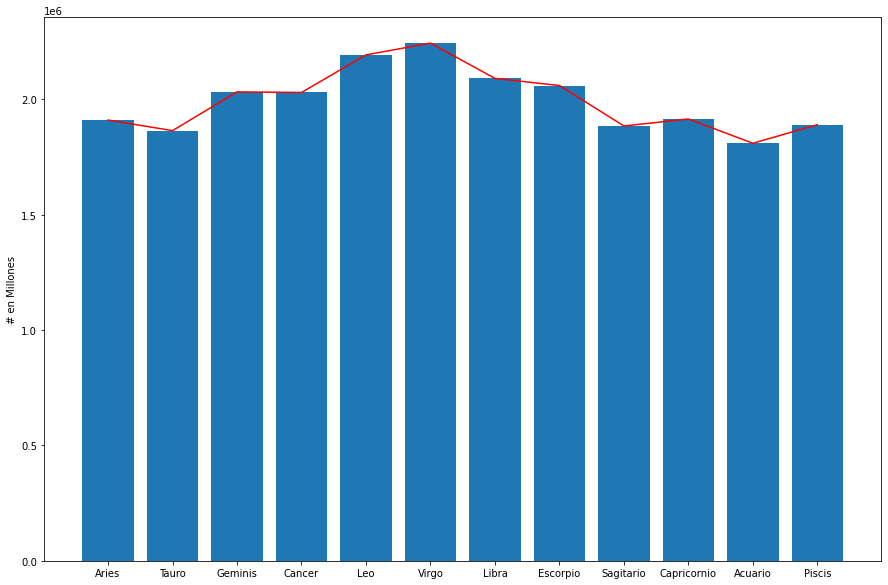

In [104]:
plt.figure(figsize=(15, 10))
plt.plot(nombres,zodiac,color='r')
plt.bar(nombres,zodiac)
plt.ylabel('# en Millones')
plt.xticks()

In [106]:
### Total
total = sum(zodiac)

In [110]:
teorico = total/12
teorico

1992681.117742562

In [115]:
### Calculamos chi cuadrado
chi = 0
for i in zodiac:
    chi = ((i-teorico)**2)/teorico
    print(chi)


3469.905893832566
8374.91843759559
757.2707174592767
653.4043638582604
19857.8186442099
31390.80951591959
4734.013731155451
2199.439311525307
5961.641844421344
3107.0082557663504
16967.5330450859
5364.505238173631


10729.010476347263

This repo contains an introduction to [Jupyter](https://jupyter.org) and [IPython](https://ipython.org).

Outline of some basics:

* [Notebook Basics](../examples/Notebook/Notebook%20Basics.ipynb)
* [IPython - beyond plain python](../examples/IPython%20Kernel/Beyond%20Plain%20Python.ipynb)
* [Markdown Cells](../examples/Notebook/Working%20With%20Markdown%20Cells.ipynb)
* [Rich Display System](../examples/IPython%20Kernel/Rich%20Output.ipynb)
* [Custom Display logic](../examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Running a Secure Public Notebook Server](../examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter works](../examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

You can also get this tutorial and run it on your laptop:

    git clone https://github.com/ipython/ipython-in-depth

Install IPython and Jupyter:

with [conda](https://www.anaconda.com/download):

    conda install ipython jupyter

with pip:

    # first, always upgrade pip!
    pip install --upgrade pip
    pip install --upgrade ipython jupyter

Start the notebook in the tutorial directory:

    cd ipython-in-depth
    jupyter notebook